<a href="https://colab.research.google.com/github/SiweiLuo/DL_with_Python/blob/master/mnist_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf 
import matplotlib.pyplot as plt 


from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/",one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [7]:
print("No of images in training set {}".format(mnist.train.images.shape))
print("No of labels in training set {}".format(mnist.train.labels.shape))

print("No of images in test set {}".format(mnist.test.images.shape))
print("No of labels in test set {}".format(mnist.test.labels.shape))

No of images in training set (55000, 784)
No of labels in training set (55000, 10)
No of images in test set (10000, 784)
No of labels in test set (10000, 10)


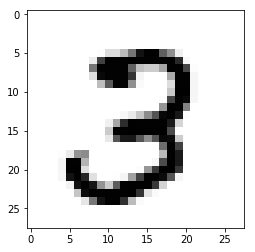

In [8]:
img1 = mnist.train.images[41].reshape(28,28)
plt.imshow(img1,cmap='Greys')

In [0]:
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

In [0]:
learning_rate = 0.1 
epochs = 10 
batch_size = 100 


In [11]:
w_xh = tf.Variable(tf.random_normal([784,300],stddev=0.03),name='w_xh')
b_h = tf.Variable(tf.random_normal([300]),name='b_h')

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
w_hy = tf.Variable(tf.random_normal([300,10],stddev=0.03),name='w_hy')
b_y = tf.Variable(tf.random_normal([10]),name='b_y')

In [0]:
z1 = tf.add(tf.matmul(x,w_xh),b_h)
a1 = tf.nn.relu(z1)
z2 = tf.add(tf.matmul(a1,w_hy),b_y)
yhat = tf.nn.softmax(z2) 

In [0]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y*tf.log(yhat),reduction_indices=[1]))

In [15]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

Instructions for updating:
Use tf.cast instead.


In [0]:
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(yhat,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [0]:
init_op = tf.global_variables_initializer()

In [19]:
with tf.Session() as sess: 
  sess.run(init_op)
  total_batch = int(len(mnist.train.labels)/batch_size)
  for epoch in range(epochs):
    avg_cost = 0 
    for i in range(total_batch):
      batch_x,batch_y = mnist.train.next_batch(batch_size=batch_size)
      _, c = sess.run([optimizer,cross_entropy],feed_dict={x:batch_x,y:batch_y})
      avg_cost += c / total_batch
    print("Epoch:",(epoch+1),"cost = ""{:.3f}".format(avg_cost))
  print(sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels}))

Epoch: 1 cost = 0.546
Epoch: 2 cost = 0.294
Epoch: 3 cost = 0.238
Epoch: 4 cost = 0.198
Epoch: 5 cost = 0.167
Epoch: 6 cost = 0.144
Epoch: 7 cost = 0.126
Epoch: 8 cost = 0.112
Epoch: 9 cost = 0.101
Epoch: 10 cost = 0.091
0.9689
